In [3]:
import os, sys
import glob
import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [79]:
def convert_to_spectrogram(wav_file_path):
    signal, sampling_rate = load_sound_file(wav_file_path)

    #Mel spectrogram calculation
    db_mels = []
    for channel in range(signal.shape[0]):
        mel = librosa.feature.melspectrogram(signal[channel], sr=sampling_rate, n_fft=self.n_fft, hop_length=self.hop_length,\
                                         n_mels=self.n_mels)
        db_mel = librosa.power_to_db(mel, ref=np.max)
        db_mels.append(db_mel)

    return np.array(db_mels), np.array(sampling_rate)
        
    
def load_sound_file(wav_name, mono=False, channel=0):
    multi_channel_data, sampling_rate = librosa.load(wav_name, sr=None, mono=mono)
    signal = np.array(multi_channel_data)

    return signal, sampling_rate

def scale_minmax(X, min=0.0, max=1.0):
    """
    Minmax scaler for a numpy array
    
    PARAMS
    ======
        X (numpy array) - array to scale
        min (float) - minimum value of the scaling range (default: 0.0)
        max (float) - maximum value of the scaling range (default: 1.0)
    """
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def generate_spectrograms(list_files, output_dir, n_mels=64, n_fft=2048, hop_length=512):
    """
    Generate spectrograms pictures from a list of WAV files. Each sound
    file in WAV format is processed to generate a spectrogram that will 
    be saved as a PNG file.
    
    PARAMS
    ======
        list_files (list) - list of WAV files to process
        output_dir (string) - root directory to save the spectrogram to
        n_mels (integer) - number of Mel buckets (default: 64)
        n_fft (integer) - length of the windowed signal to compute the short Fourier transform on
        hop_length (integer) - window increment when computing STFT
        
    RETURNS
    =======
        files (list) - list of spectrogram files (PNG format)
    """
    files = []
    
    # Loops through all files:
    for index in tqdm(range(len(list_files)), desc=f'Building spectrograms for {output_dir}'):
        
        # Building file name for the spectrogram PNG picture:
        file = list_files[index]
        path_components = file.split('/')
        
        # machine_id = id_00, id_02...
        # sound_type = normal or abnormal
        # wav_file is the name of the original sound file without the .wav extension
        machine_id, sound_type = path_components[-3], path_components[-2]
        machine = path_components[-5]
        wav_file = path_components[-1].split('.')[0]
        filename =  machine + '-' + sound_type + '-' + machine_id + '-' + wav_file + '.png'
        
        # Example: train/normal/normal-id_02-00000259.png:
        filename = os.path.join(output_dir, sound_type, filename)
        #print(filename)
        if not os.path.exists(filename):
            FRAME_SIZE = 2048
            HOP_SIZE = 512
            
            # Loading sound file and generate Mel spectrogram:
            signal, sr = librosa.load(file)#load_sound_file(file)
            #print(signal.shape)
            
            spec = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
            spec = spec.astype(np.float16)
            #print(spec.dtype)
            #print("Memory size of numpy array in bytes:",spec.size * spec.itemsize)
            np.savez_compressed(filename[:-4] + "-ch" + str(0), spec)
            #print(spec.shape, sr)
            
#             for ctr in range(signal.shape[0]):
#                 mels = librosa.feature.melspectrogram(y=signal[ctr], sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
#                 mels = librosa.power_to_db(mels, ref=np.max)

#                 # Preprocess the image: min-max, putting 
#                 # low frequency at bottom and inverting to 
#                 # match higher energy with black pixels:
#                 img = scale_minmax(mels, 0, 255).astype(np.uint8)
#                 img = np.flip(img, axis=0)
#                 img = 255 - img
#                 img = Image.fromarray(img)

#                 # Saving the picture generated to disk:
#                 img.save(filename[:-4] + "-ch" + str(ctr+1) + ".png" )

#         files.append(filename)
        
    return files

In [74]:
#Please edit as needed. This path should have the following directory structure
#    base_data_path -> {0,6,neg6}_dB_{fan,pump,valve,slider}/{fan,pump,valve,slider}/*.wav
base_data_path = "/home/ubuntu/anudeep/machine_sound/"

def get_data_path(SNR, machine, ID):
    return glob.glob(base_data_path + \
                     "{}_{}/*/id_{}/*/*".format(SNR, machine, ID))

# Direct paths to audio files
paths = get_data_path('0_dB', 'fan', '00')
paths = paths[0:2]
paths.sort()

In [81]:
paths = glob.glob(base_data_path + "*/*/*/*/*")

In [ ]:
a = generate_spectrograms(paths, "/home/ubuntu/anudeep/machine_sound/image_data_2/")

Building spectrograms for /home/ubuntu/anudeep/machine_sound/image_data_2/:   0%|          | 0/54057 [00:00<?, ?it/s]<ipython-input-79-b84b98965758>:82: ComplexWarning: Casting complex values to real discards the imaginary part
  spec = spec.astype(np.float16)
Building spectrograms for /home/ubuntu/anudeep/machine_sound/image_data_2/:   2%|▏         | 1148/54057 [05:09<3:50:25,  3.83it/s]

In [ ]:
paths = glob.glob(base_data_path + "*/*/*/*/*")
len(paths)

In [ ]:
paths = glob.glob(base_data_path + "*/*/*/*/*")
len(paths)

In [8]:
imgs = glob.glob('/home/ubuntu/anudeep/machine_sound/image_data/normal/*')

In [10]:
imgs.sort()

In [14]:
unique_dBs = []

for k in imgs:
    _t = k.split('/')[-1].split('-')[0]
    if _t not in unique_dBs:
        unique_dBs.append(_t)

In [15]:
unique_dBs

['0_dB_fan',
 '0_dB_pump',
 '0_dB_slider',
 '0_dB_valve',
 '6_dB_fan',
 '6_dB_pump',
 '6_dB_slider',
 '6_dB_valve',
 'neg6_dB_fan',
 'neg6_dB_pump',
 'neg6_dB_slider',
 'neg6_dB_valve']

In [65]:
a = np.load('./abnormal/0_dB_fan-abnormal-id_00-00000030-ch0.npy')

In [67]:
a.shape, a.dtype

((), dtype('float32'))

In [1]:
import numpy as np

In [2]:
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt

files = glob.glob('../../../data/abnormal/*')

In [15]:
import random
def spec_augment(spec: np.ndarray, num_mask=2,
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)

        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)

        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0

    return spec

(1025, 431)
(220500,)
(160000,)
(1025, 313) 22050
(128, 313)
(128, 313) [-8.0000000e+01 -7.9983498e+01 -7.9932404e+01 ... -1.5065575e-01
 -3.3079624e-02  4.7683716e-07]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


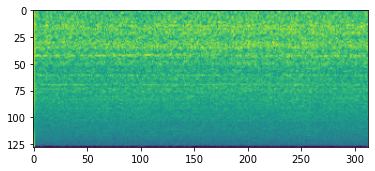

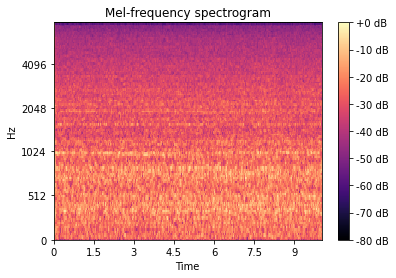

In [115]:
for l in range(1):
    a = np.load(files[l])['arr_0']
    print(a.shape)
    
    a = librosa.istft(a.astype(np.float32), hop_length=512, win_length=2048, window='hann', center=False, dtype=None, length=220500)
    
    print(a.shape)
    a = librosa.resample(a, 22050, 16000)
    print(a.shape)
    
    spec = librosa.stft(a, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    spec = spec.astype(np.float16)
    print(spec.shape, sr)
    D = np.abs(spec)**2

    S = librosa.feature.melspectrogram(S=D, sr=sr2, n_mels=128)

    #S = spec_augment(S)
    print(S.shape)
    S_dB = librosa.power_to_db(S, ref=np.max)[:128,:]

    print(S_dB.shape, np.unique(S_dB))

    plt.imshow(S_dB)
    plt.show()

    fig, ax = plt.subplots()

    img = librosa.display.specshow(S_dB, x_axis='time',
                              y_axis='mel', sr=16000
                          , ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()


    
#     D = np.abs(a)**2

#     S = librosa.feature.melspectrogram(S=D, sr=22050, n_mels=128)
    
#     #S = spec_augment(S)
#     print(S.shape)
#     S_dB = librosa.power_to_db(S, ref=np.max)[:128, :431]
    
#     print(S_dB.shape, np.unique(S_dB))
    
#     plt.imshow(S_dB)
#     plt.show()
    
#     fig, ax = plt.subplots()
    
#     img = librosa.display.specshow(S_dB, x_axis='time',
#                           y_axis='mel', sr=22050
#                           , ax=ax)
#     fig.colorbar(img, ax=ax, format='%+2.0f dB')
#     ax.set(title='Mel-frequency spectrogram')
#     plt.show()

In [13]:
import soundfile as sf 
import numpy as np
import librosa

y, sr = sf.read('00000000.wav')
images = []
channel = 0
transformed_y = y[:, channel]
print(transformed_y.shape)
len_y = len(transformed_y)
effective_length = sr * 10
if len_y < effective_length:
    new_y = np.zeros(effective_length, dtype=y.dtype)
    start = np.random.randint(effective_length - len_y)
    new_y[start:start + len_y] = transformed_y
    transformed_y = new_y.astype(np.float32)
elif len_y > effective_length:
    start = np.random.randint(len_y - effective_length)
    transformed_y = transformed_y[start:start + effective_length].astype(np.float32)
else:
    transformed_y = transformed_y.astype(np.float32)
print(transformed_y.shape)

melspec = librosa.feature.melspectrogram(transformed_y, sr=sr, n_mels=128,n_fft=2048,hop_length=512,power=2.0,fmin=20,fmax=8000)    

#             if not self.is_val:
#                 if self.spectrogram_transforms:
#                     #melspec = self.spectrogram_transforms(melspec)
#                     prob = random.uniform(0, 1)
#                     if prob <= 0.5:   
#                         melspec = spec_augment(melspec)
#                 else:
#                     pass

# Is this necessary
melspec = librosa.power_to_db(melspec).astype(np.float32)

(160000,)
(160000,)


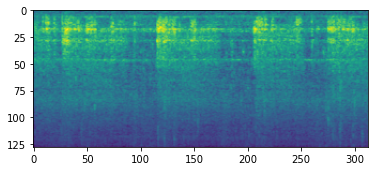

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(melspec)

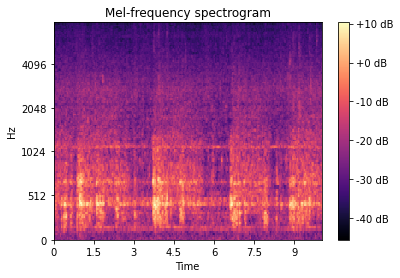

In [15]:
import librosa.display

fig, ax = plt.subplots()
    
img = librosa.display.specshow(melspec, x_axis='time',
                      y_axis='mel', sr=16000
                      , ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

(220500,)
(1025, 313) 22050
(128, 313)
(128, 313) [-80.       -79.982765 -79.95911  ...  -1.210571  -0.618804   0.      ]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


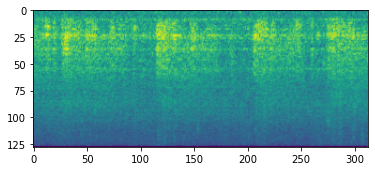

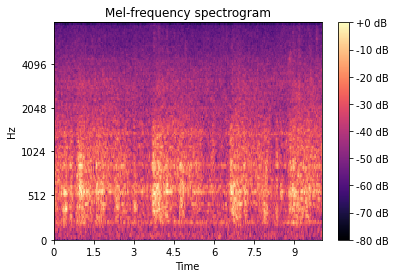

In [126]:
FRAME_SIZE = 2048
HOP_SIZE = 512

# Loading sound file and generate Mel spectrogram:
for sr2 in [22050]:
    signal, sr = librosa.load('00000000.wav', sr=sr2)#load_sound_file(file)
    print(signal.shape)


    spec = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    
    a = librosa.istft(spec.astype(np.float32), hop_length=512, win_length=2048, window='hann', center=True, dtype=None, length=220500)
    
    a = librosa.resample(a, 22050, 16000, res_type='soxr_vhq')
    
    spec = librosa.stft(a, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    
    spec = spec.astype(np.float16)
    print(spec.shape, sr)
    D = np.abs(spec)**2

    S = librosa.feature.melspectrogram(S=D, sr=sr2, n_mels=128)

    #S = spec_augment(S)
    print(S.shape)
    S_dB = librosa.power_to_db(S, ref=np.max)

    print(S_dB.shape, np.unique(S_dB))

    plt.imshow(S_dB)
    plt.show()

    fig, ax = plt.subplots()

    img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=16000
                          , ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()


In [13]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

ROOT = Path.cwd()
INPUT_ROOT = ROOT / "../../../data"

tmp_list = []
npz_files = glob.glob(str(INPUT_ROOT) + '/*/*')
for npz_file in npz_files:
    wav_fpath = npz_file
    wav_fname = npz_file.split('/')[-1]
    machine_db_type, operation_type, machine_id, file_id, channel_no = npz_file.split('/')[-1].split('-')
    machine_type = machine_db_type.split('_')[-1]
    tmp_list.append( [machine_type, machine_id, operation_type,
                                         wav_fname, wav_fpath])


train_all = pd.DataFrame(
    tmp_list, columns=["machine_type", "id_type", "operation_type",
                        "wav_filename", "wav_file_path"])

print(train_all.sample(n=5, random_state=1))
print('All df shape ', train_all.shape)

train_df, test_df = train_test_split(train_all, test_size=0.15, random_state=1234)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=1234)

print('Train df shape ', train_df.shape)
print('Test df shape ', test_df.shape)
print('Val df shape ', val_df.shape)

#TODO: Here we can select to use only normal or abnormal data for training

train_file_list = train_df[["wav_file_path", "machine_type"]].values.tolist()
val_file_list = val_df[["wav_file_path", "machine_type"]].values.tolist()

print("train: {}, val: {}".format(len(train_file_list), len(val_file_list)))

      machine_type id_type operation_type  \
23392       slider   id_02         normal   
16946          fan   id_06         normal   
33934         pump   id_06         normal   
37262         pump   id_04         normal   
10030          fan   id_02         normal   

                                     wav_filename  \
23392   0_dB_slider-normal-id_02-00000210-ch0.npz   
16946      6_dB_fan-normal-id_06-00000688-ch0.npz   
33934     0_dB_pump-normal-id_06-00000910-ch0.npz   
37262  neg6_dB_pump-normal-id_04-00000448-ch0.npz   
10030   neg6_dB_fan-normal-id_02-00000151-ch0.npz   

                                           wav_file_path  
23392  /home/anudeep/pytorch_machine/src/machine_soun...  
16946  /home/anudeep/pytorch_machine/src/machine_soun...  
33934  /home/anudeep/pytorch_machine/src/machine_soun...  
37262  /home/anudeep/pytorch_machine/src/machine_soun...  
10030  /home/anudeep/pytorch_machine/src/machine_soun...  
All df shape  (54057, 5)
Train df shape  (39055, 5)
Test

In [48]:
#test_df["combined"] = test_df["operation_type"] + test_df["machine_type"]

index = pd.Index(list(test_df.combined))
l = list(index.value_counts())
print(l)
for k in range(4):
    print(l[k], l[4+k], l[k] / l[4+k])

[1815, 1724, 1601, 1454, 675, 389, 252, 199]
1815 675 2.688888888888889
1724 389 4.4318766066838045
1601 252 6.353174603174603
1454 199 7.306532663316583


In [49]:
#train_df["combined"] = train_df["operation_type"] + train_df["machine_type"]

index = pd.Index(list(train_df.combined))
index.value_counts()
l = list(index.value_counts())
print(l)
for k in range(4):
    print(l[k], l[4+k], l[k] / l[4+k])

[8916, 8077, 7993, 6942, 3187, 1927, 1025, 988]
8916 3187 2.7976153122058363
8077 1927 4.191489361702128
7993 1025 7.798048780487805
6942 988 7.026315789473684


In [50]:
#val_df["combined"] = val_df["operation_type"] + val_df["machine_type"]

index = pd.Index(list(val_df.combined))
index.value_counts()
l = list(index.value_counts())
print(l)
for k in range(4):
    print(l[k], l[4+k], l[k] / l[4+k])

[1494, 1479, 1446, 1216, 563, 354, 181, 160]
1494 563 2.653641207815275
1479 354 4.177966101694915
1446 181 7.988950276243094
1216 160 7.6
